In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import matplotlib.ticker as ticker

In [2]:
df = pd.read_json('all.json')

In [3]:
df.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,name,release_date,popularity,artist
0,0.755,0.837,2,-2.718,0,0.1420,0.09910,0.000000,0.2890,0.714,...,0HPD5WQqrq7wPWR7P7Dw1i,spotify:track:0HPD5WQqrq7wPWR7P7Dw1i,https://api.spotify.com/v1/tracks/0HPD5WQqrq7w...,https://api.spotify.com/v1/audio-analysis/0HPD...,199693,4,TiK ToK,2010-01-01,81,Kesha
1,0.587,0.622,4,-5.535,1,0.0303,0.09270,0.000636,0.2000,0.231,...,11EX5yhxr9Ihl3IN1asrfK,spotify:track:11EX5yhxr9Ihl3IN1asrfK,https://api.spotify.com/v1/tracks/11EX5yhxr9Ih...,https://api.spotify.com/v1/audio-analysis/11EX...,277573,4,Need You Now,2010-01-01,71,Lady A
2,0.673,0.886,1,-4.440,0,0.0431,0.18500,0.000000,0.0826,0.795,...,4HlFJV71xXKIGcU3kRyttv,spotify:track:4HlFJV71xXKIGcU3kRyttv,https://api.spotify.com/v1/tracks/4HlFJV71xXKI...,https://api.spotify.com/v1/audio-analysis/4HlF...,216773,4,"Hey, Soul Sister",2010-12-01,82,Train
3,0.791,0.754,0,-3.729,1,0.0569,0.00446,0.000000,0.1630,0.425,...,6tS3XVuOyu10897O3ae7bi,spotify:track:6tS3XVuOyu10897O3ae7bi,https://api.spotify.com/v1/tracks/6tS3XVuOyu10...,https://api.spotify.com/v1/audio-analysis/6tS3...,234653,4,California Gurls,2012-03-12,76,Katy Perry
4,0.781,0.745,4,-5.810,0,0.0332,0.19800,0.000011,0.3600,0.326,...,1bM50INir8voAkVoKuvEUI,spotify:track:1bM50INir8voAkVoKuvEUI,https://api.spotify.com/v1/tracks/1bM50INir8vo...,https://api.spotify.com/v1/audio-analysis/1bM5...,269493,4,OMG (feat. will.i.am),2010-03-30,73,Usher
5,0.660,0.867,6,-4.285,0,0.1160,0.11000,0.000000,0.0368,0.377,...,6lV2MSQmRIkycDScNtrBXO,spotify:track:6lV2MSQmRIkycDScNtrBXO,https://api.spotify.com/v1/tracks/6lV2MSQmRIky...,https://api.spotify.com/v1/audio-analysis/6lV2...,180480,4,Airplanes (feat. Hayley Williams of Paramore),2010-04-27,75,B.o.B
6,0.749,0.925,10,-5.034,1,0.2270,0.24100,0.000000,0.5200,0.641,...,15JINEqzVMv3SvJTAXAKED,spotify:track:15JINEqzVMv3SvJTAXAKED,https://api.spotify.com/v1/tracks/15JINEqzVMv3...,https://api.spotify.com/v1/audio-analysis/15JI...,263373,4,Love The Way You Lie,2010-06-18,82,Eminem
7,0.696,0.921,0,-3.755,1,0.0363,0.00314,0.000052,0.0842,0.714,...,0SiywuOBRcynK0uKGWdCnn,spotify:track:0SiywuOBRcynK0uKGWdCnn,https://api.spotify.com/v1/tracks/0SiywuOBRcyn...,https://api.spotify.com/v1/audio-analysis/0Siy...,294573,4,Bad Romance,2009-11-05,82,Lady Gaga
8,0.754,0.804,4,-3.177,1,0.0853,0.00332,0.000000,0.0329,0.818,...,1DqdF42leyFIzqNDv9CjId,spotify:track:1DqdF42leyFIzqNDv9CjId,https://api.spotify.com/v1/tracks/1DqdF42leyFI...,https://api.spotify.com/v1/audio-analysis/1Dqd...,203867,4,Dynamite,2010-01-01,65,Taio Cruz
9,0.666,0.899,8,-4.676,1,0.0280,0.00155,0.000000,0.0677,0.629,...,1CdqVF1ywD0ZO1zXtB9yWa,spotify:track:1CdqVF1ywD0ZO1zXtB9yWa,https://api.spotify.com/v1/tracks/1CdqVF1ywD0Z...,https://api.spotify.com/v1/audio-analysis/1Cdq...,186267,4,Break Your Heart,2010-01-01,61,Taio Cruz


In [4]:
#changing release_date to just year only
df['year'] = pd.DatetimeIndex(df['release_date']).year

In [5]:
#move songname, popularity and release year ahead in the df
df.insert(0, 'name', df.pop('name'))
df.insert(1, 'artist', df.pop('artist'))
df.insert(2, 'year', df.pop('year'))
df.insert(3, 'popularity', df.pop('popularity'))

In [6]:
drop_columns = ['type', 'id', 'uri', 'track_href', 'analysis_url','release_date']
df.drop(drop_columns, axis = 1, inplace = True)
df.head()

,name,artist,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,TiK ToK,Kesha,2010,81,0.755,0.837,2,-2.718,0,0.1420,0.09910,0.000000,0.2890,0.714,120.028,199693,4
1,Need You Now,Lady A,2010,71,0.587,0.622,4,-5.535,1,0.0303,0.09270,0.000636,0.2000,0.231,107.943,277573,4
2,"Hey, Soul Sister",Train,2010,82,0.673,0.886,1,-4.440,0,0.0431,0.18500,0.000000,0.0826,0.795,97.012,216773,4
3,California Gurls,Katy Perry,2012,76,0.791,0.754,0,-3.729,1,0.0569,0.00446,0.000000,0.1630,0.425,125.014,234653,4
4,OMG (feat. will.i.am),Usher,2010,73,0.781,0.745,4,-5.810,0,0.0332,0.19800,0.000011,0.3600,0.326,129.998,269493,4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1000 non-null   object 
 1   artist            1000 non-null   object 
 2   year              1000 non-null   int64  
 3   popularity        1000 non-null   int64  
 4   danceability      1000 non-null   float64
 5   energy            1000 non-null   float64
 6   key               1000 non-null   int64  
 7   loudness          1000 non-null   float64
 8   mode              1000 non-null   int64  
 9   speechiness       1000 non-null   float64
 10  acousticness      1000 non-null   float64
 11  instrumentalness  1000 non-null   float64
 12  liveness          1000 non-null   float64
 13  valence           1000 non-null   float64
 14  tempo             1000 non-null   float64
 15  duration_ms       1000 non-null   int64  
 16  time_signature    1000 non-null   int64  
d

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,1000.0,2014.107000,2.954027,2008.0,2012.000000,2014.0000,2017.000000,2021.000
popularity,1000.0,53.717000,29.655663,0.0,43.750000,66.0000,74.000000,92.000
danceability,1000.0,0.664602,0.135949,0.0,0.581000,0.6725,0.754000,0.970
energy,1000.0,0.679843,0.158631,0.0,0.581000,0.7020,0.802000,0.972
key,1000.0,5.388000,3.677633,0.0,2.000000,6.0000,9.000000,11.000
loudness,1000.0,-5.751874,3.105892,-60.0,-6.658750,-5.4035,-4.308250,-1.190
mode,1000.0,0.631000,0.482775,0.0,0.000000,1.0000,1.000000,1.000
speechiness,1000.0,0.101814,0.097905,0.0,0.040675,0.0588,0.119250,0.592
acousticness,1000.0,0.146832,0.190568,0.0,0.019700,0.0665,0.194750,0.978
instrumentalness,1000.0,0.003997,0.035880,0.0,0.000000,0.0000,0.000008,0.680


In [23]:
df['popularity'].value_counts().head()

53.717    162
74.000     36
72.000     36
71.000     35
77.000     33
Name: popularity, dtype: int64

In [10]:
#replacing 0 values with mean value
df['popularity'] = df['popularity'].replace(0,df['popularity'].mean())
df['popularity'].value_counts().head()

53.717    162
74.000     36
72.000     36
71.000     35
77.000     33
Name: popularity, dtype: int64

In [11]:
dup = df[df.duplicated(['name','artist'])]
alldup = df[df.duplicated(['name','artist'], keep = False)]
print(len(dup),len(alldup),"ratio",len(alldup)/len(dup))
dup.head(5)

93 186 ratio 2.0


,name,artist,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
114,Just the Way You Are,Bruno Mars,2010,82.0,0.635,0.841,5,-5.379,1,0.0422,0.01340,0.000000,0.0622,0.424,109.021,220734,4
134,If I Die Young,The Band Perry,2010,68.0,0.606,0.497,4,-6.611,1,0.0277,0.34800,0.000000,0.2750,0.362,130.739,222773,4
139,Only Girl (In The World),Rihanna,2010,55.0,0.786,0.716,11,-4.253,0,0.0409,0.10200,0.000017,0.0557,0.595,125.921,235520,4
143,Dynamite,Taio Cruz,2010,65.0,0.754,0.804,4,-3.177,1,0.0853,0.00332,0.000000,0.0329,0.818,119.968,203867,4
151,Just A Dream,Nelly,2010,74.0,0.531,0.752,1,-6.161,1,0.0305,0.04210,0.000000,0.1200,0.103,89.917,237800,4


In [12]:
#we can conclude that there are 93 songs that appear in two charts. since the ratio is 2, there is no song that appear in three charts. 

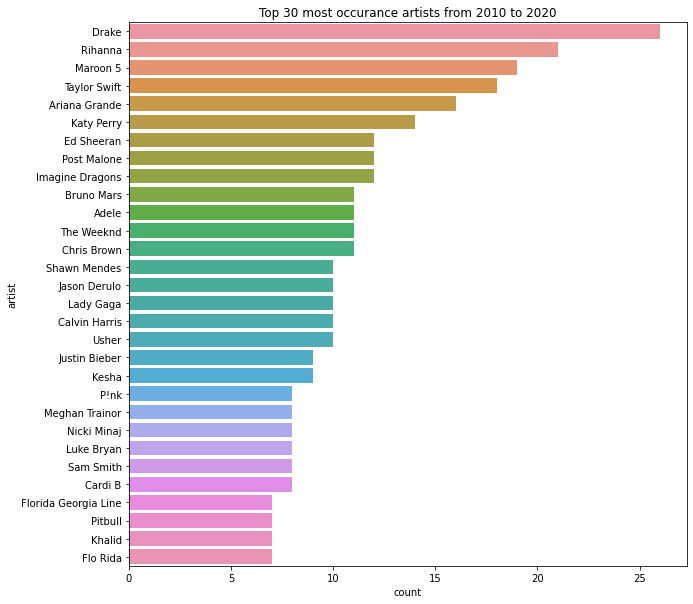

In [13]:
plt.figure(figsize=(10,10))
sns.countplot(y='artist', data=df, order=df['artist'].value_counts().head(30).index).set_title('Top 30 most occurance artists from 2010 to 2020')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix of track data')

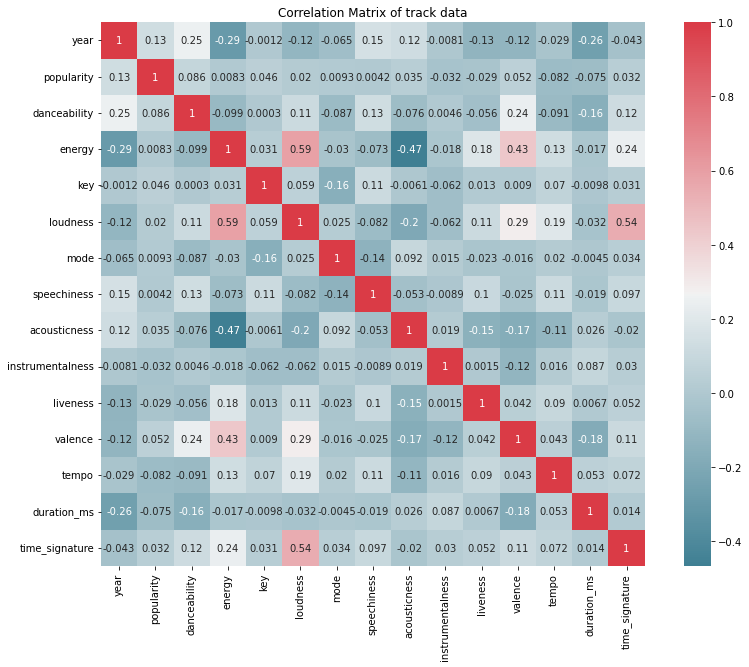

In [14]:
#getting correlation matrix
f, ax = plt.subplots(figsize=(14, 10))
corr = df.corr()
sns.heatmap(corr, annot = True, mask=np.zeros_like(corr, dtype=np.bool_), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('Correlation Matrix of track data')

<AxesSubplot:xlabel='popularity', ylabel='duration_ms'>

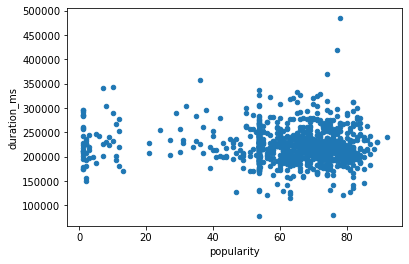

In [21]:
#scatterplot for duration and popularity
df.plot.scatter(x = 'popularity', y = 'duration_ms')

In [24]:
dfx = df.query('popularity < 20')
dfx

,name,artist,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
19,Imma Be,Black Eyed Peas,2009,1.0,0.597,0.517,0,-6.963,1,0.3650,0.179000,0.000000,0.3070,0.412,92.035,257560,4
28,I Gotta Feeling,Black Eyed Peas,2009,10.0,0.743,0.766,0,-6.375,1,0.0265,0.087300,0.000000,0.5090,0.610,127.960,289133,4
40,Down,Jay Sean,2009,1.0,0.657,0.695,2,-4.493,1,0.0321,0.010800,0.000000,0.0822,0.683,65.997,212107,4
57,Meet Me Halfway,Black Eyed Peas,2009,1.0,0.798,0.629,11,-6.857,0,0.0735,0.004740,0.000022,0.3240,0.400,130.000,284373,4
69,Impossible,Shontelle,2010,2.0,0.599,0.624,8,-3.631,1,0.0343,0.385000,0.000000,0.1250,0.539,90.034,226533,4
92,The Only Exception,Paramore,2010,11.0,0.452,0.563,4,-6.607,1,0.0272,0.144000,0.000000,0.1430,0.209,137.715,267653,3
94,King of Anything - Radio Mix,Sara Bareilles,2011,2.0,0.619,0.680,1,-7.492,1,0.0490,0.188000,0.000000,0.0655,0.771,119.009,208267,4
96,Smile,Uncle Kracker,2009,11.0,0.552,0.832,4,-3.579,1,0.0311,0.191000,0.000000,0.3800,0.599,141.065,201933,4
123,Someone Like You,Adele,2011,1.0,0.559,0.330,9,-8.251,1,0.0285,0.892000,0.000000,0.0975,0.285,135.109,285040,4
180,Country Girl (Shake It For Me),Luke Bryan,2011,7.0,0.645,0.904,2,-4.532,1,0.0462,0.029300,0.000000,0.0834,0.671,105.970,225560,4


In [16]:
from sklearn.linear_model import LinearRegression
